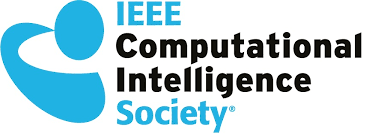

## Introduction
This notebook will introduce you to class imbalance problem.



#### Imbalanced Problem
Imbalanced classes are a common problem in machine learning classification where there are a disproportionate ratio of observations in each class. Class imbalance can be found in many different areas including medical diagnosis, spam filtering, and fraud detection.

#### Agenda
*  Loading Libraries
*  Loading Data
*  Getting Basic Idea About Data
*  Missing Values and Dealing with Missing Values
*  One Hot Encoding (Creating dummies for categorical columns)
*  Standardization / Normalization
*  Splitting the dataset into train and test data
*  Dealing with Imbalanced Data
    *  Resampling Techniques - Oversample Minority Class
    *  Resampling Techniques - Undersample Majority Class
    *  Generate Synthetic Samples



## Loading Libraries
All Python capabilities are not loaded to our working environment by default (even they are already installed in your system). So, we import each and every library that we want to use.

In data science, numpy and pandas are most commonly used libraries. Numpy is required for calculations like means, medians, square roots, etc. Pandas is used for data processin and data frames. We chose alias names for our libraries for the sake of our convenience (numpy --> np and pandas --> pd).

In [ ]:
import pandas as pd                  # A fundamental package for linear algebra and multidimensional arrays
import numpy as np                   # Data analysis and data manipulating tool
import random                        # Library to generate random numbers
from collections import Counter      # Collection is a Python module that implements specialized container datatypes providing 
                                     # alternatives to Python’s general purpose built-in containers, dict, list, set, and tuple.
                                     # Counter is a dict subclass for counting hashable objects
# Visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

# To ignore warnings in the notebook
import warnings
warnings.filterwarnings("ignore")

## Loading Data
Pandas module is used for reading files. We have our data in '.csv' format. We will use 'read_csv()' function for loading the data.

**Disclaimer:** Loading fraud data will take time.

In [ ]:
# This is a subset of the original data available at kaggle.
fraud_data = pd.read_csv("https://raw.githubusercontent.com/dphi-official/Imbalanced_classes/master/fraud_data.csv")

### Getting Basic Idea About Data

In [ ]:
fraud_data.head()

In [ ]:
fraud_data.info()      # Returns a concise summary of dataset

There are 434 columns with 59054 observations.

In [ ]:
# Taking a look at the target variable
fraud_data.isFraud.value_counts()       # The value_counts() function is used to get a Series containing counts of unique values.

We can notice, of 57049 observations / records only 2005 were fraud transactions.

In [ ]:
fraud_data.isFraud.value_counts() / len(fraud_data) * 100       # Gets the percentage of unique values in the variable 'isFraud'

In [ ]:
# we can also use countplot form seaborn to plot the above information graphically.
sns.countplot(fraud_data.isFraud)

There are only 3% of the data which are fraud and the rest 97% are not fraud. This is clearly a class imbalance problem. In this notebook we will look to solve this type of problems.

### Missing values
Generally datasets always have some missing values. May be done during data collection, or due to some data validation rule.


In [ ]:
fraud_data.isnull().sum() / len(fraud_data) * 100   # To get percentage of missing data in each column

Out of 434 columns, 414 have some missing values.

### Dealing with Missing Values
*  Filling the missing values with right technique can change our results drastically. 
*  Also, there is no fixed rule of filling the missing values.
*  No method is perfect for filling the missing values. We need to use our common sense, our logic, or may need to see what works for that particular data set.

### Ways of dealing with missing values:

**Default value:** One can fill the missing value by default value on the basis of one's 1) understanding of variable, 2) context / data insight or 3) common sense / logic. 

**Deleting:** Suppose in our dataset we have too many missing values in

*  Column, we can drop the column
*  Row, drop the row. Usually we do this for a large enough dataset.

**Mean/Median/Mode - Imputation:** We fill missing values by mean or median or mode(i.e. maximum occuring value). Generally we use mean but if there are some outliers, we fill missing values with median. Mode is used to fill missing values for categorical column.

[Data Cleaning in Python: the Ultimate Guide](https://towardsdatascience.com/data-cleaning-in-python-the-ultimate-guide-2020-c63b88bf0a0d)

Eliminate columns with more than 20% missing values. Again this is very subjective and solely depends on the nature of the dataset and underlying context. We cannot generalize this procedure to all the datasets.

In [ ]:
fraud_data = fraud_data[fraud_data.columns[fraud_data.isnull().mean() < 0.2]]    # Will keep those columns which has missing values less than 20%

Here we will fill missing values of numerical variables (or columns) with mean value.

**Variables are nothing but the column names. From here on we will start using the variables instead of column or column names.**





In [ ]:
# filling missing values of numerical columns with mean value.
num_cols = fraud_data.select_dtypes(include=np.number).columns      # getting all the numerical columns

fraud_data[num_cols] = fraud_data[num_cols].fillna(fraud_data[num_cols].mean())   # fills the missing values with mean

Filling missing values of categorical variables with mode. 
For those unattended, Mode is maximum occuring element in a variable.

Why mode for categorical variables? - Let's take an example of categorical variable: "Social Status" with values: (Poor, Mid-income level, Rich). Can we find mean for social satus? No! So it may not be meaningful to go with mean in this case as it is not valid.

In [ ]:
cat_cols = fraud_data.select_dtypes(include = 'object').columns    # getting all the categorical columns

fraud_data[cat_cols] = fraud_data[cat_cols].fillna(fraud_data[cat_cols].mode().iloc[0])  # fills the missing values with maximum occuring element in the column

"""
Explaining above line:

The above line of code is replacing the missing values in the columns in cat_cols with the mode (most repeated elements) of the non-missing values 
in the same columns.
The .iloc[0] attribute is selecting just the first mode returned, in case they are multiple values with the same highest frequency of occurrence. 
Please review the documentation for further clarifications on this regard: 
https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.mode.html
"""

In [ ]:
# Let's have a look if there still exist any missing values
fraud_data.isnull().sum() / len(fraud_data) * 100

Notice, now we don't have any column with missing value.

### One Hot Encoding (Creating dummies for categorical columns)
In this strategy, each category value is converted into a new column and assigned a 1 or 0 (notation for true/false) value to the column. In Python there is a class 'OneHotEncoder' in 'sklearn.preprocessing' to do this task, but here we will use pandas function 'get_dummies()'. This get_dummies() does the same work as done by 'OneHotEncoder' form sklearn.preprocessing.


![alt text](https://dphi.tech/wp-content/uploads/2020/06/ohe.png)

[Why One-Hot Encode Data in Machine Learning?](https://machinelearningmastery.com/why-one-hot-encode-data-in-machine-learning/)

In [ ]:
fraud_data = pd.get_dummies(fraud_data, columns=cat_cols)    # earlier we have collected all the categorical columns in cat_cols

In [ ]:
fraud_data.head()

If you notice, a lot of dummy variables are created like; **P_emaildomain_hotmail.com, P_emaildomain_hotmail.de,** etc.

#### Separate Input Features and Output Features

In [ ]:
# Separate input features and output feature
X = fraud_data.drop(columns = ['isFraud'])       # input features
Y = fraud_data.isFraud      # output feature

### Standardization / Normalization
Often variables in a real dataset come with a wide range of data values.

For example if you look at this fraud dataset, the variable 'TransactionAmt' has values in range 0.292 to 5279.95, while if you look at variable 'V14', it has values in the range 0.0 to 1.0. Basically, they are not on a common scale.

**Now how does standardization/normalization help?**

Performing standardization/normalization would bring all the variables in a dataset to a common scale so that it could further help in implementing various machine learning models (where standardization/normalization is a pre-requisite to apply such models). Again, don’t take this for granted, there are some smart algorithms which doesn’t need this and will explore one of them here.


Here we will use 'StandardScaler' class of 'sklearn.preprocessing' to scale our data.

![alt text](https://dphi.tech/wp-content/uploads/2020/06/sn.png)

In [ ]:
from sklearn.preprocessing import StandardScaler
scaled_features = StandardScaler().fit_transform(X)
scaled_features = pd.DataFrame(data=scaled_features)
scaled_features.columns= X.columns

In [ ]:
# Let's see how the data looks after scaling
scaled_features.head()

### Splitting the dataset into train and test data
**Why split the data into test sets and trainig sets?**

Purpose of splitting data into the different category is to avoid overfitting.
Please go through this awesome explanation, it will take only two minutes to go through it.  

[In machine learning, what’s the purpose of splitting data up into test sets and training sets?](https://www.quora.com/In-machine-learning-what-s-the-purpose-of-splitting-data-up-into-test-sets-and-training-sets)

**What is Train/Test split?**
The data we use is split into training data and test data. The training set contains a known output and the model learns on this data in order to be generalized to other data later on. We have the test dataset (or subset) in order to test our model’s prediction on this subset.


**Further Reading:** [Train/Test Split and Cross Validation in Python](https://towardsdatascience.com/train-test-split-and-cross-validation-in-python-80b61beca4b6#:~:text=Train%2FTest%20Split,to%20other%20data%20later%20on.&text=Pandas%20%E2%80%94%20to%20load%20the%20data,frame%20and%20analyze%20the%20data.)



We will keep 30% of the data for test set.

In [ ]:
# Splitting the data
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 42)

# X_train: independent feature data for training the model
# Y_train: dependent feature data for training the model
# X_test: independent feature data for testing the model; will be used to predict the target values
# Y_test: original target values of X_test; We will compare this values with our predicted values.
 
# test_size = 0.3: 30% of the data will go for test set and 70% of the data will go for train set
# random_state = 42: this will fix the split i.e. there will be same split for each time you run the code

# Dealing with Imbalanced Data
Most machine learning algorithms work best when the number of samples in each class are about equal. This is because most algorithms are designed to maximize accuracy and reduce error. Again this can't be generalized and we must be very case specific depending on the nature of data and its underlying context.

[Dealing with Imbalanced Data](https://towardsdatascience.com/methods-for-dealing-with-imbalanced-data-5b761be45a18)

## Different Techniques
1. **Resampling Techniques - Oversample Minority Class:** Oversampling can be defined as adding more copies of the minority class. In other words, we are creating artificial/synthetic data of the minority class (or group). Oversampling could be a good choice when you don’t have a lot of data to work with.

We will use the resampling module from Scikit-Learn library to randomly create artificial samples of data from the minority class.

**Important Note**

BEFORE you try any oversampling techniques **you must** split your data into train and test datasets! 

Why it should be done that? Oversampling before splitting the data can allow the exact same observations to be present in both the test and train sets. This can allow our model to simply memorize specific data points and cause overfitting and poor generalization to the test data.



In [ ]:
# 'resample' is located under sklearn.utils
from sklearn.utils import resample

In [ ]:
# concatenate training data back together
train_data = pd.concat([X_train, Y_train], axis = 1)

In [ ]:
# separate minority and majority class
not_fraud = train_data[train_data.isFraud==0]
fraud = train_data[train_data.isFraud==1]

In [ ]:
# Unsample minority; we are oversampling the minority class to match the number of majority classs
fraud_upsampled = resample(fraud,
                           replace = True, # Sample with replacement
                           n_samples = len(not_fraud), # Match number in majority class
                           random_state=27)

In [ ]:
# combine majority and upsampled minority
upsampled = pd.concat([not_fraud, fraud_upsampled])

In [ ]:
# Now let's check the classes count
upsampled.isFraud.value_counts()

We can notice here after resampling we have an equal ratio of data points for each class!

2. **Resampling Techniques - Undersample Majority Class:** Undersampling can be defined as removing some observations of the majority class. Undersampling can be a good choice when you have a ton of data -think millions of rows. But a drawback is that we are removing information that may be valuable. This could lead to underfitting and poor generalization to the test set.

We will again use the resampling module from Scikit-Learn to randomly remove samples from the majority class.


In [ ]:
# we are still using our separated class i.e. fraud and not_fraud from above
# Again we are removing the observations of the majority class to mathch the number of minority class
# downsample majority
not_fraud_downsampled = resample(not_fraud,
                                replace = False, # sample without replacement
                                n_samples = len(fraud), # match minority n
                                random_state = 27)

In [ ]:
# combine minority and downsampled majority
downsampled = pd.concat([not_fraud_downsampled, fraud])    # Concatenation

In [ ]:
# let's check the classes counts
downsampled.isFraud.value_counts()

Again, we have an equal ratio of fraud to not fraud data points, but in this case a much smaller quantity of data to train the model on. 

3. **Generate Synthetic Samples:** Here we will use imblearn’s SMOTE or Synthetic Minority Oversampling Technique. SMOTE uses a nearest neighbors algorithm to generate new and synthetic data we can use for training our model.

Again, it’s important to generate the new samples only in the training set to ensure our model generalizes well to unseen data.

In [ ]:
# import SMOTE 
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state = 25, sampling_strategy = 1.0)   # again we are eqalizing both the classes

In [ ]:
# fit the sampling
X_train, Y_train = sm.fit_sample(X_train, Y_train)

In [ ]:
np.unique(Y_train, return_counts=True)     # Y_train is numpy array, so unique() functions returns the count of all the unique elements in the array

The count of both the classes are equal.

## Conclusion
That's it for this notebook. We learned handling missing values, one hot encoding, standardization / normalization, what is imbalanced class and three techniques to deal with imbalanced classes.


# Thanks for reading the notebook! Hope you enjoyed it.

References:
1. [Dealing with Imbalanced Data by Tara Boyle](https://towardsdatascience.com/methods-for-dealing-with-imbalanced-data-5b761be45a18)
2. [Data Pre-processing - Handling missing values and dealing with class imbalance by Bharat Ram Ammu](https://www.youtube.com/watch?v=vksQx1JNo8Y)
3. https://www.kaggle.com/drgilermo/a-tutorial-for-complete-beginners